<a href="https://colab.research.google.com/github/Kyungmin-Yu/BTC_prediction/blob/main/vis_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import random

In [ ]:
from sklearn.datasets import make_classification
X,y = make_classification(n_samples=1000, n_features=20, n_informative=8,n_redundant=2 ,n_repeated=0, n_classes=2, class_sep=1.0, hypercube=True,scale=1.0, shuffle=False, random_state=None, weights= [0.99, 0.01])
df = pd.concat([pd.DataFrame(y, columns=["y"]),pd.DataFrame(X),pd.DataFrame({"cat":random.choices([0,1,2], k=1000, weights= [0.3, 0.6, 0.1])})], axis=1)

In [ ]:
df['poli_no'] = [random.randrange(10,100) for i in range(1000)]
df['ym']=random.choices(['202103','202104','202105','202106','202107','202108'],k=1000)

In [ ]:
cat_var = ["cat"]

In [ ]:
num_var = [0,1,2,3]

In [ ]:
num_mean_df = df.groupby('poli_no')[num_var].mean().reset_index()

In [ ]:
uniq_ym_df = df.sort_values(["poli_no", "ym"], ascending=False).drop_duplicates(subset=['poli_no', 'cat'], keep="first")

In [ ]:
cat_cnt= df.groupby(["poli_no", "cat"], as_index=False)["cat"].size()

In [ ]:
pd.merge(cat_cnt, uniq_ym_df[["poli_no", "cat", "ym"]], on = ['poli_no', 'cat']).sort_values(["poli_no", "size","ym"], ascending=False).drop_duplicates()

,poli_no,cat,size,ym
230,99,1,10,202108
229,99,0,3,202108
231,99,2,1,202106
227,98,1,6,202108
226,98,0,3,202108
...,...,...,...,...
3,11,0,2,202106
5,11,2,1,202103
1,10,1,12,202108
0,10,0,3,202108


In [ ]:
# for문 : -가 있으면 - 제외하고 최빈, zz있음 zz 제외하고 최빈값, 그 후에 na인 것들은 전체 최빈값
cat_mode_df = df.groupby('poli_no')[cat_var].agg(pd.Series.mode).reset_index()

In [ ]:
#### 시각화 ####

In [ ]:
df.quantile([.25, .75], axis=0)

,y,0,1,2,3,4,5,6,7,8,...,11,12,13,14,15,16,17,18,19,cat
0.25,0.0,-1.241892,-1.194031,-2.090399,-0.028447,-0.040444,-2.155622,-0.070832,-0.181791,1.343979,...,-0.731310,-0.714735,-0.631897,-0.667715,-0.702683,-0.636162,-0.772466,-0.658711,-0.690488,0.0
0.75,0.0,1.238378,1.184506,0.085561,1.982934,2.126052,0.138505,2.071855,2.196001,4.468618,...,0.584048,0.639547,0.698092,0.628154,0.669488,0.712598,0.682319,0.712746,0.682273,1.0


In [ ]:
df_plot = df.groupby(['y', 'cat']).size().reset_index().pivot(columns='cat', index='y', values=0)


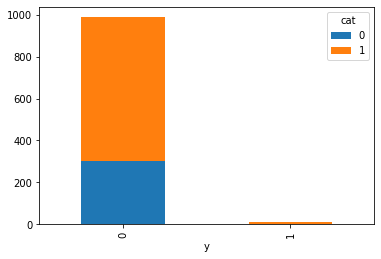

In [ ]:
df_plot.plot(kind='bar', stacked=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 22 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   y       1000 non-null   int64  
 1   0       1000 non-null   float64
 2   1       1000 non-null   float64
 3   2       1000 non-null   float64
 4   3       1000 non-null   float64
 5   4       1000 non-null   float64
 6   5       1000 non-null   float64
 7   6       1000 non-null   float64
 8   7       1000 non-null   float64
 9   8       1000 non-null   float64
 10  9       1000 non-null   float64
 11  10      1000 non-null   float64
 12  11      1000 non-null   float64
 13  12      1000 non-null   float64
 14  13      1000 non-null   float64
 15  14      1000 non-null   float64
 16  15      1000 non-null   float64
 17  16      1000 non-null   float64
 18  17      1000 non-null   float64
 19  18      1000 non-null   float64
 20  19      1000 non-null   float64
 21  cat     1000 non-null   int64  
dtypes

In [ ]:
cat_col = ["y", "cat"]

In [ ]:
for col in cat_col:
    df[col] = df[col].astype('str',copy=False)

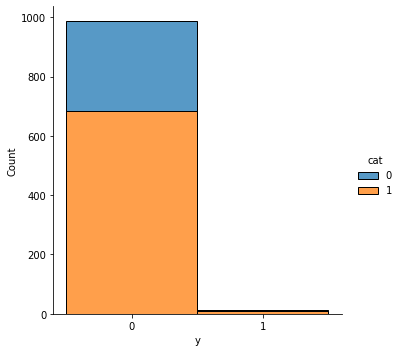

In [ ]:
import seaborn as sns
sns.displot(df, x='y', hue='cat', multiple='stack')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


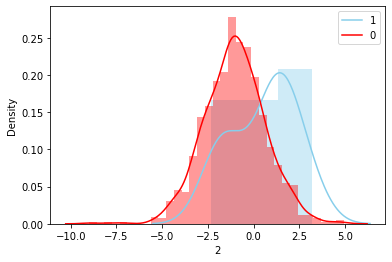

In [ ]:
import matplotlib.pyplot as plt
sns.distplot(df[df.y=='1'][2], color="skyblue", label="1")
sns.distplot(df[df.y=='0'][2], color="red", label="0")
plt.legend(labels=['1', '0'])


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


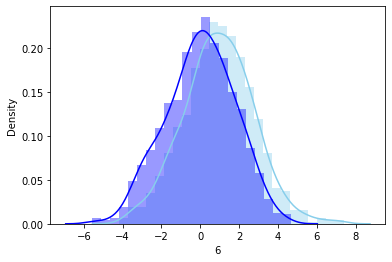

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.distplot(df[3], color="skyblue", label="3")
sns.distplot(df[6], color="blue", label="6")

#sns.distplot(df[df.y=='0'][2], color="red", label="0")
#plt.legend(labels=['1', '0'])

In [ ]:
change_df = df.groupby('ym')[3, 6, 9].mean()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


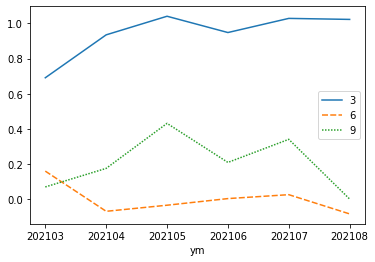

In [ ]:
sns.lineplot(data = change_df)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

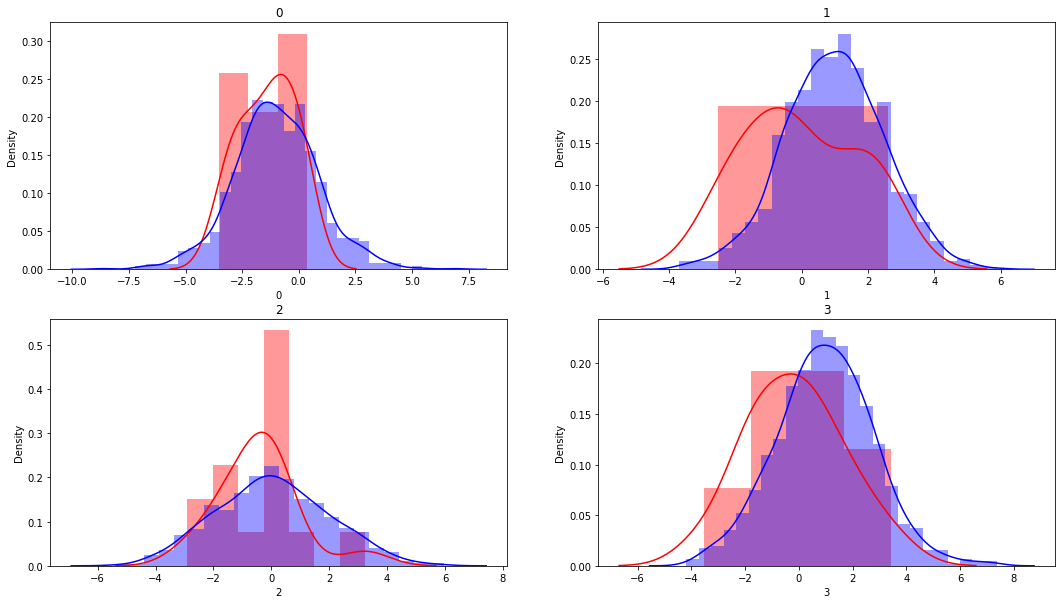

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(18, 10))

for i in range(len(num_var)):
  a = i//2
  b = i%2
  #sns.distplot(axes[a,b], df[num_var[i]])
  #sns.distplot(df[num_var[i]], ax=axes[a,b])
  sns.distplot(df[df.y==1][num_var[i]] ,ax=axes[a,b], color="red")
  sns.distplot(df[df.y==0][num_var[i]] ,ax=axes[a,b], color="blue").set(title=num_var[i])
plt.show()


In [ ]:
#### 변수 선택 ####

In [ ]:
! pip install ReliefF

     |████████████████████████████████| 48 kB 2.2 MB/s 
  Created wheel for ReliefF: filename=ReliefF-0.1.2-py3-none-any.whl size=6319 sha256=9d27bd1124f359671177b17a1f40889b917efae7f6e961c7a9ec1f494a598674
  Stored in directory: /root/.cache/pip/wheels/18/8a/4a/3aada56cb869df4c1b1ed6af509c941a25985d1d1258a2e78c
Successfully built ReliefF


In [ ]:
from ReliefF import ReliefF

In [ ]:
! pip install sklearn_relief

In [ ]:
import sklearn_relief as sr

In [ ]:
X = df.drop(['y', 'poli_no', 'ym'], axis=1)
y = df[['y']]
fs = ReliefF()

In [ ]:
X_train = fs.fit_transform(X, y.values.tolist())
X_train.shape

AttributeError: ignored